<font size=6>**Flight Price Prediction**

<font size=5>**Problem Statement:**

<font size=3>Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Size of training set: 10683 records

# Size of test set: 2671 records

# FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

<font size=4>**Importing the required libraries**

In [19]:
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
import pandas_profiling
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [20]:
df=pd.read_excel('Data_Train.xlsx')
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

<font size=6>**Exploratory Data Analysis(EDA)**

In [21]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(10)

We have 10683 Rows and 11 Columns in our dataframe


Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info  Price  
0                      No info   3897  
1                      No info   7662  
2                      No info  13882  
3                      No info   6218  
4                      No info  13302  
5                      No info   3873  
6  In-flight meal not included  11087  
7                      No info  22270  
8  In-flight meal not included  11087  
9                      No info   8625

# column description
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [22]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Great we have no missing values left,therefore we won't have to worry about handling missing data. However we will try to confirm the same information with a visual on it.

<AxesSubplot:>

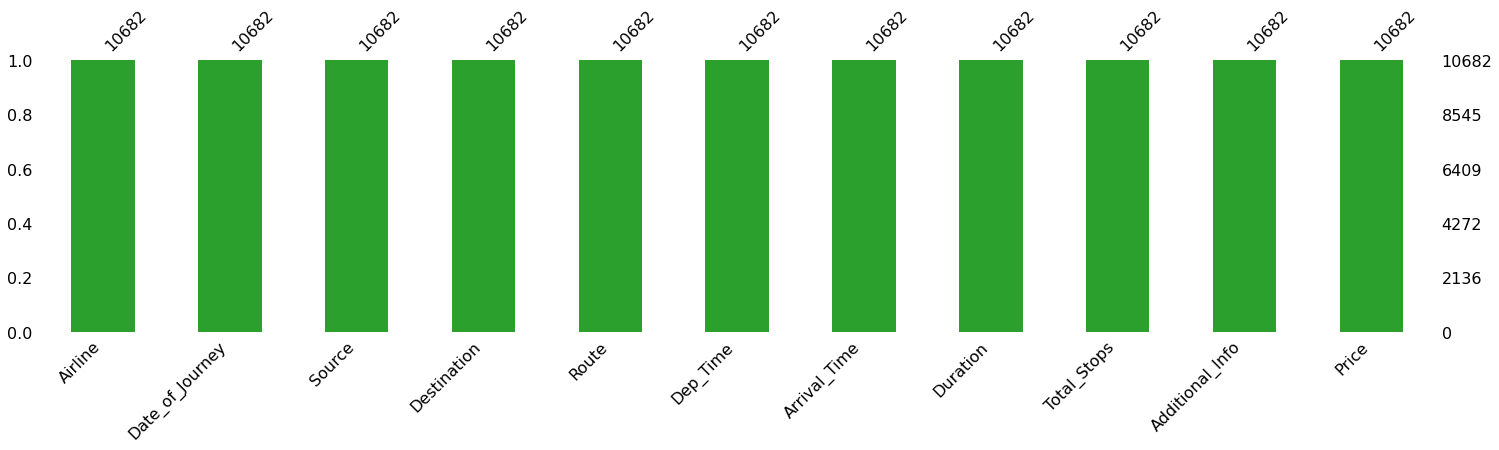

In [25]:
missingno.bar(df,figsize=(25,5),color="tab:green")

Was just ensuring the missing data information with the help of a visual. Looks like none of the columns in our dataset has any null value present in them.

In [26]:
print("Missing column values in percentage:")
for col in df:
    percentage = np.round((df[col].isnull().sum()/df.shape[0])*100, 6)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Airline : 0.0 %
Date_of_Journey : 0.0 %
Source : 0.0 %
Destination : 0.0 %
Route : 0.0 %
Dep_Time : 0.0 %
Arrival_Time : 0.0 %
Duration : 0.0 %
Total_Stops : 0.0 %
Additional_Info : 0.0 %
Price : 0.0 %


Was taking a look at the missing data percentage post visual to ensure there are no empty records.

<font size=4>**checking information of the dataset**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


Using the info method we are able to confirm the non null count details as well as the datatype information. We have all 9 columns showing as object datatype therefore some data cleaning is required to fix those details.

In [28]:
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
Source                       5
Total_Stops                  5
Destination                  6
Additional_Info             10
Airline                     12
Date_of_Journey             44
Route                      128
Dep_Time                   222
Duration                   368
Arrival_Time              1343
Price                     1870

With the help of nunique and sort_values methods we can see the number of unique values present in each of the columns of our dataset.

In [31]:
value = ["Additional_Info", "Total_Stops", "Source", "Destination"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("-"*60)

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64
------------------------------------------------------------
Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
------------------------------------------------------------
Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
------------------------------------------------------------
Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: i

I have listed the unique value information for the columns "Meal_Availability", "Number_Of_Stops", "Airline_Names", "Source_Place" and "Destination_Place" to see the values as they contain less than 10 unique values in those columns. This also shows that atleast in these columns we do not have to worry about any junk data being present.

<font size=5>**Data Pre Processing**

**seprationg the day month year columns from date of journey**

In [32]:
df['day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['month']= pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month
df['year']= pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.year

**dropping the date of journey because we separated them**

In [33]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [34]:
df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  day  month  year  
0  01:10 22 Mar   2h 50m    non-stop         No info   3897   24      3  2019  
1         13:15   7h 25m     2 stops         No info   7662    1      5  2019  
2  04:25 10 Jun      19h     2 stops         No info  13882    9      6  2019  
3         23:30   5h 25m      1 stop         No info   6218   12      5  2019  
4         21:35   4h 45m      1 stop         No info  13302    1      3  2019

**seprating the departure time column into departure hour and departure minute**

In [35]:
df['dep_hour']= pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_minute']= pd.to_datetime(df['Dep_Time']).dt.minute

**dropping the departure time column because we have new**

In [36]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [37]:
df.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  day  month  year  dep_hour  \
0   2h 50m    non-stop         No info   3897   24      3  2019        22   
1   7h 25m     2 stops         No info   7662    1      5  2019         5   
2      19h     2 stops         No info  13882    9      6  2019         9   
3   5h 25m      1 stop         No info   6218   12      5  2019        18   
4   4h 45m      1 stop         No info  13302    1      3  2019        16   

   dep_minute  
0          20  
1          50  
2          25  
3           5  
4          50

**separating the aarrival hour and arrival minutes from arrval time**

In [38]:
df['Arrival_hour']= pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']= pd.to_datetime(df['Arrival_Time']).dt.minute

**dropping the column to make usefull dataset**

In [39]:
df.drop(['Arrival_Time'],axis=1,inplace=True)
df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  day  month  year  dep_hour  dep_minute  \
0    non-stop         No info   3897   24      3  2019        22          20   
1     2 stops         No info   7662    1      5  2019         5          50   
2     2 stops         No info  13882    9      6  2019         9          25   
3      1 stop         No info   6218   12      5  2019        18           5   
4      1 stop         No info  13302    1      3  2019        16          50   

   Arrival_hour  Arrival_minute  
0             1              10  
1            13              15  
2             4              25  
3            23              30  
4            21              35

**assigning the new column of duration than splitting its data into hour and minutes**

In [40]:
duration1 = list(df["Duration"])
for i in range(len(duration1)):
    if (len(duration1[i].split())) != 2:
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"
        else:
            duration1[i] = "0h " + duration1[i]

**splitting the data**

In [41]:
duration_hour = []
duration_min =[]
for i in range(len(duration1)):
    duration_hour.append(int(duration1[i].split(sep = "h")[0]))
    duration_min.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

In [42]:
df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  day  month  year  dep_hour  dep_minute  \
0    non-stop         No info   3897   24      3  2019        22          20   
1     2 stops         No info   7662    1      5  2019         5          50   
2     2 stops         No info  13882    9      6  2019         9          25   
3      1 stop         No info   6218   12      5  2019        18           5   
4      1 stop         No info  13302    1      3  2019        16          50   

   Arrival_hour  Arrival_minute  
0             1              10  
1            13              15  
2             4              25  
3            23              30  
4            21              35

**sepratting the column duration into duration hour and minutes**

In [43]:
df['duration_hour']= duration_hour
df['duration_min']= duration_min

**dropping the duration column because we have new one**

In [44]:
df.drop(['Duration'],axis=1,inplace=True)
df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  day  month  year  dep_hour  dep_minute  \
0         No info   3897   24      3  2019        22          20   
1         No info   7662    1      5  2019         5          50   
2         No info  13882    9      6  2019         9          25   
3         No info   6218   12      5  2019        18           5   
4         No info  13302    1      3  2019        16          50   

   Arrival_hour  Arrival_minute  duration_hour  duration_min  
0             1              10              2            50  
1            13              15              7            25  
2             4              25             19             0  
3            23              30              5            25  
4            21              35              4            45

In [49]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
dep_hour            int64
dep_minute          int64
Arrival_hour        int64
Arrival_minute      int64
duration_hour       int64
duration_min        int64
dtype: object

I have listed the data type values of all our columns after the conversion and we will be using encoding methods to deal with the remaining object data type column values later.

In [50]:
df.describe(include="all").T

count unique              top  freq         mean  \
Airline            10682     12      Jet Airways  3849          NaN   
Source             10682      5            Delhi  4536          NaN   
Destination        10682      6           Cochin  4536          NaN   
Route              10682    128  DEL → BOM → COK  2376          NaN   
Total_Stops        10682      5           1 stop  5625          NaN   
Additional_Info    10682     10          No info  8344          NaN   
Price            10682.0    NaN              NaN   NaN  9087.214567   
day              10682.0    NaN              NaN   NaN    13.509081   
month            10682.0    NaN              NaN   NaN     4.708575   
year             10682.0    NaN              NaN   NaN       2019.0   
dep_hour         10682.0    NaN              NaN   NaN    12.491013   
dep_minute       10682.0    NaN              NaN   NaN    24.409287   
Arrival_hour     10682.0    NaN              NaN   NaN    13.349186   
Arrival_minute   10682.0    NaN              NaN   NaN    24.690601   
duration_hour    10682.0    NaN              NaN   NaN    10.244898   
duration_min     10682.0    NaN              NaN   NaN    28.326624   

                        std     min     25%     50%      75%      max  
Airline                 NaN     NaN     NaN     NaN      NaN      NaN  
Source                  NaN     NaN     NaN     NaN      NaN      NaN  
Destination             NaN     NaN     NaN     NaN      NaN      NaN  
Route                   NaN     NaN     NaN     NaN      NaN      NaN  
Total_Stops             NaN     NaN     NaN     NaN      NaN      NaN  
Additional_Info         NaN     NaN     NaN     NaN      NaN      NaN  
Price            4611.54881  1759.0  5277.0  8372.0  12373.0  79512.0  
day                8.479363     1.0     6.0    12.0     21.0     27.0  
month              1.164408     3.0     3.0     5.0      6.0      6.0  
year                    0.0  2019.0  2019.0  2019.0   2019.0   2019.0  
dep_hour            5.74882     0.0     8.0    11.0     18.0     23.0  
dep_minute        18.767801     0.0     5.0    25.0     40.0     55.0  
Arrival_hour       6.859317     0.0     8.0    14.0     19.0     23.0  
Arrival_minute    16.506808     0.0    10.0    25.0     35.0     55.0  
duration_hour      8.494916     0.0     2.0     8.0     15.0     47.0  
duration_min      16.945817     0.0    15.0    30.0     45.0     55.0

Using the describe method I am taking a look at all the column value details and basically it's count, mean, standard deviation, min, 25%, 50%, 75% and max quartile data.

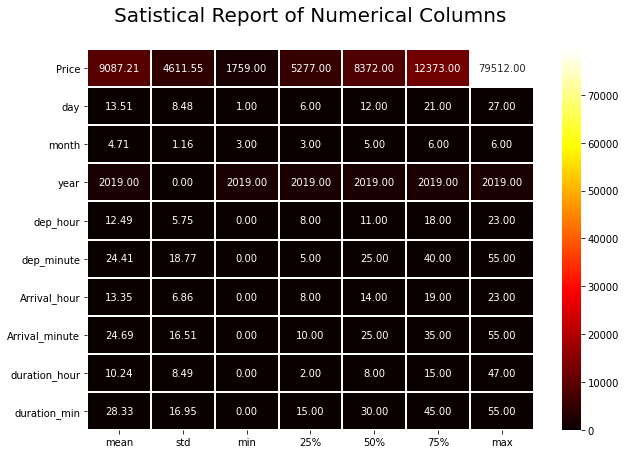

In [51]:
plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n", fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In the visual representation we have taken into consideration only the numeric data part and can see that the only abnormality is present in our label column "Flight_Prices" which is higher than all the other values.

In [52]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**pandas-profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. It generates interactive reports in web format that can be presented to any person, even if they don’t know programming. It also offers report generation for the dataset with lots of features and customizations for the report generated. In short, what pandas-profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.**

**making the cateogry plot for relatinship betweeen airlines and price**

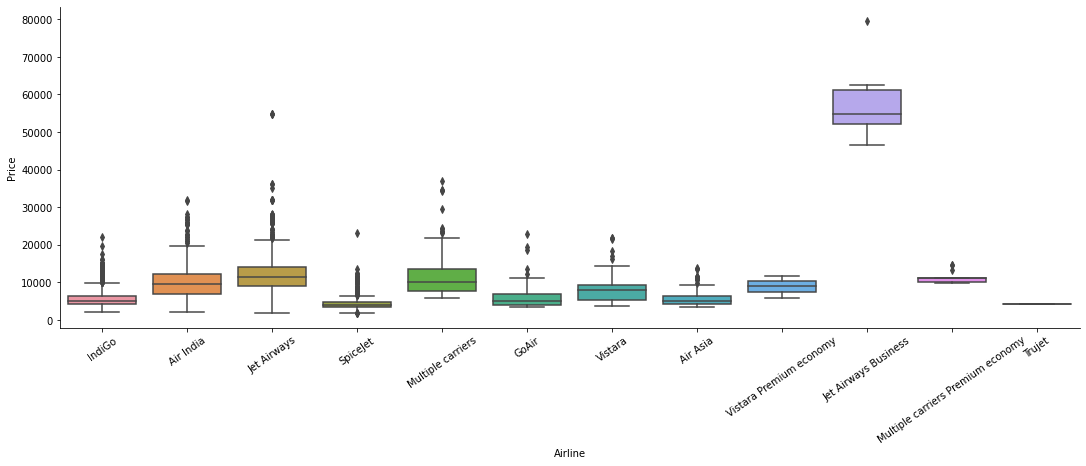

In [53]:
sns.catplot(x='Airline',y='Price',data=df,kind='box',aspect=3)
plt.xticks(rotation=35)
plt.show()

**checking the relation of source with price**

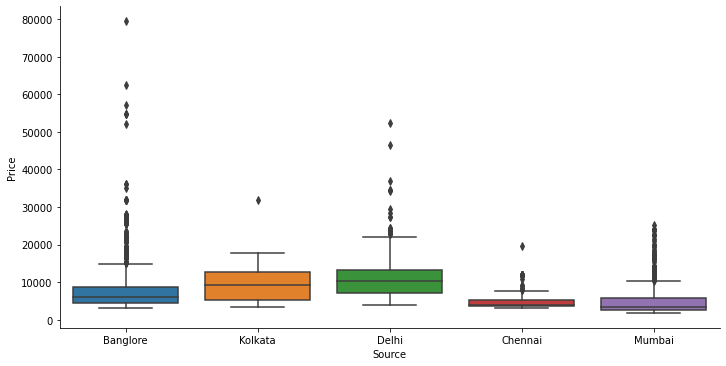

In [54]:
sns.catplot(x='Source',y='Price',data=df,kind='box',aspect=2)

**checking the relationship between total stops nd price**

<function matplotlib.pyplot.show(close=None, block=None)>

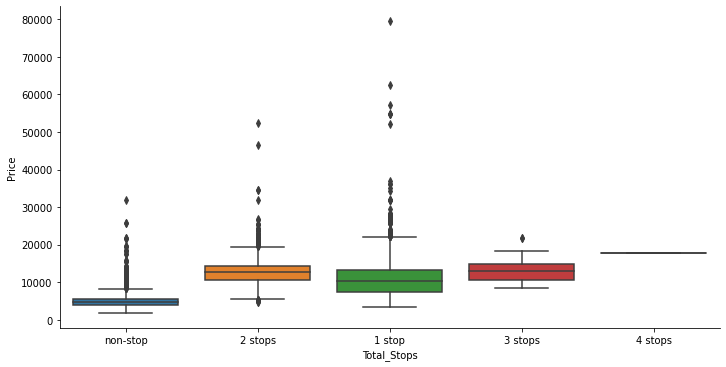

In [55]:
sns.catplot(x='Total_Stops',y='Price',data= df,kind='box',aspect=2)
plt.show

**getting the dummy data for the column**

In [56]:
airline=df[['Airline']]
airline= pd.get_dummies(airline, drop_first= True)

**checking the new head od the dataset**

In [57]:
airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

**getting the dummy data for the column**

In [58]:
source= df[['Source']]
source= pd.get_dummies(source, drop_first=True)

In [59]:
source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

**getting the dummy data for the column**

In [60]:
destination= df[['Destination']]
destination= pd.get_dummies(destination, drop_first=True)
destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

**dropping the unusefull columns**

In [61]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

**checking vaue counts for the column total stop**

In [62]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

**replacing the variables in the total stop column**

In [63]:
df.replace({'non-stop':0, '1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

**merging the data into new dataframe**

In [64]:
df= pd.concat([df,airline,source,destination],axis=1)

In [65]:
df.head()

Airline    Source Destination  Total_Stops  Price  day  month  year  \
0       IndiGo  Banglore   New Delhi            0   3897   24      3  2019   
1    Air India   Kolkata    Banglore            2   7662    1      5  2019   
2  Jet Airways     Delhi      Cochin            2  13882    9      6  2019   
3       IndiGo   Kolkata    Banglore            1   6218   12      5  2019   
4       IndiGo  Banglore   New Delhi            1  13302    1      3  2019   

   dep_hour  dep_minute  ...  Airline_Vistara Premium economy  Source_Chennai  \
0        22          20  ...                                0               0   
1         5          50  ...                                0               0   
2         9          25  ...                                0               0   
3        18           5  ...                                0               0   
4        16          50  ...                                0               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             0               0              0                   0   
1             0               1              0                   0   
2             1               0              0                   1   
3             0               1              0                   0   
4             0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1  

[5 rows x 34 columns]

In [69]:
df.head()

Total_Stops  Price  day  month  year  dep_hour  dep_minute  Arrival_hour  \
0            0   3897   24      3  2019        22          20             1   
1            2   7662    1      5  2019         5          50            13   
2            2  13882    9      6  2019         9          25             4   
3            1   6218   12      5  2019        18           5            23   
4            1  13302    1      3  2019        16          50            21   

   Arrival_minute  duration_hour  ...  Airline_Vistara Premium economy  \
0              10              2  ...                                0   
1              15              7  ...                                0   
2              25             19  ...                                0   
3              30              5  ...                                0   
4              35              4  ...                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1  

[5 rows x 31 columns]

<font size=5>**importing the test file**

In [71]:
df1=pd.read_excel('Test_set.xlsx')
df1

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

**checking for nnull values**

In [72]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

**separating the date of journey data into day month year**

In [73]:
df1['day'] = pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.day
df1['month']= pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.month
df1['year']= pd.to_datetime(df1.Date_of_Journey,format="%d/%m/%Y").dt.year

In [74]:
df1.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  \
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info   
1    06:20         10:20       4h      1 stop                      No info   
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included   
3    08:00         21:00      13h      1 stop                      No info   
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info   

   day  month  year  
0    6      6  2019  
1   12      5  2019  
2   21      5  2019  
3   21      5  2019  
4   24      6  2019

**dropping tthe unecessory data**

In [75]:
df1.drop(['Date_of_Journey'],axis=1,inplace=True)

**separating the data into hour and minutes to make it usefull**

In [76]:
df1['departure_hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['departure_minute']=pd.to_datetime(df1['Dep_Time']).dt.minute
df1.drop(['Dep_Time'],axis=1,inplace=True)

In [78]:
df1.head()

Airline    Source Destination            Route  Arrival_Time  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK  04:25 07 Jun   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR         10:20   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK  19:00 22 May   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK         21:00   
4           Air Asia  Banglore       Delhi        BLR → DEL  02:45 25 Jun   

  Duration Total_Stops              Additional_Info  day  month  year  \
0  10h 55m      1 stop                      No info    6      6  2019   
1       4h      1 stop                      No info   12      5  2019   
2  23h 45m      1 stop  In-flight meal not included   21      5  2019   
3      13h      1 stop                      No info   21      5  2019   
4   2h 50m    non-stop                      No info   24      6  2019   

   departure_hour  departure_minute  
0              17                30  
1               6                20  
2              19                15  
3               8                 0  
4              23                55

**splitting the variables of duration into minutes and hours**

In [84]:
duration1 = list(df1["Duration"])
for i in range(len(duration1)):
    if (len(duration1[i].split())) != 2:
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"
        else:
            duration1[i] = "0h " + duration1[i]

**spliting the data**

In [85]:
duration_hours = []
duration_mins =[]
for i in range(len(duration1)):
    duration_hours.append(int(duration1[i].split(sep = "h")[0]))
    duration_mins.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

**seprating the duration column into hour and minutes**

In [86]:
df1['duration_hour']= duration_hours
df1['duration_mins']= duration_mins

In [87]:
df1.head()

Airline    Source Destination            Route Duration  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK  10h 55m   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR       4h   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK  23h 45m   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      13h   
4           Air Asia  Banglore       Delhi        BLR → DEL   2h 50m   

  Total_Stops              Additional_Info  day  month  year  departure_hour  \
0      1 stop                      No info    6      6  2019              17   
1      1 stop                      No info   12      5  2019               6   
2      1 stop  In-flight meal not included   21      5  2019              19   
3      1 stop                      No info   21      5  2019               8   
4    non-stop                      No info   24      6  2019              23   

   departure_minute  arrival_hour  arrival_minute  duration_hour  \
0                30             4              25             10   
1                20            10              20              4   
2                15            19               0             23   
3                 0            21               0             13   
4                55             2              45              2   

   duration_mins  
0             55  
1              0  
2             45  
3              0  
4             50

**dropping the unnecessory data**

In [88]:
df1.drop(['Duration'],axis=1,inplace=True)
df1.drop(['Route'],axis=1, inplace=True)
df1.drop(['Additional_Info'],axis=1, inplace=True)

In [89]:
df1.head()

Airline    Source Destination Total_Stops  day  month  year  \
0        Jet Airways     Delhi      Cochin      1 stop    6      6  2019   
1             IndiGo   Kolkata    Banglore      1 stop   12      5  2019   
2        Jet Airways     Delhi      Cochin      1 stop   21      5  2019   
3  Multiple carriers     Delhi      Cochin      1 stop   21      5  2019   
4           Air Asia  Banglore       Delhi    non-stop   24      6  2019   

   departure_hour  departure_minute  arrival_hour  arrival_minute  \
0              17                30             4              25   
1               6                20            10              20   
2              19                15            19               0   
3               8                 0            21               0   
4              23                55             2              45   

   duration_hour  duration_mins  
0             10             55  
1              4              0  
2             23             45  
3             13              0  
4              2             50

**getting the dummy data**

In [90]:
airline=df1['Airline']
airline= pd.get_dummies(airline, drop_first=True)

In [91]:
airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       0            1                     0   
1          0      0       1            0                     0   
2          0      0       0            1                     0   
3          0      0       0            0                     0   
4          0      0       0            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Vistara  \
0                  0                                  0         0        0   
1                  0                                  0         0        0   
2                  0                                  0         0        0   
3                  1                                  0         0        0   
4                  0                                  0         0        0   

   Vistara Premium economy  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

**getting the dummy data**

In [92]:
source=df1['Source']
source=pd.get_dummies(source, drop_first=True)

In [93]:
source.head()

Chennai  Delhi  Kolkata  Mumbai
0        0      1        0       0
1        0      0        1       0
2        0      1        0       0
3        0      1        0       0
4        0      0        0       0

**getting the dummy data for the column destinaton**

In [94]:
destination=df1['Destination']
destination=pd.get_dummies(destination, drop_first=True)

In [95]:
destination.head()

Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       1      0          0        0          0
1       0      0          0        0          0
2       1      0          0        0          0
3       1      0          0        0          0
4       0      1          0        0          0

**checking the value count for total stops**

In [96]:
df1['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

**replcing the variables of total stop columns**

In [97]:
df1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

**dropping the unnecessory data**

In [98]:
df1.drop(['Airline','Source','Destination'],axis=1,inplace=True)

**merging the data into new datast**

In [99]:
df1=pd.concat([df1,airline,source,destination],axis=1)

In [100]:
df1.head()

Total_Stops  day  month  year  departure_hour  departure_minute  \
0            1    6      6  2019              17                30   
1            1   12      5  2019               6                20   
2            1   21      5  2019              19                15   
3            1   21      5  2019               8                 0   
4            0   24      6  2019              23                55   

   arrival_hour  arrival_minute  duration_hour  duration_mins  ...  \
0             4              25             10             55  ...   
1            10              20              4              0  ...   
2            19               0             23             45  ...   
3            21               0             13              0  ...   
4             2              45              2             50  ...   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                        0        0      1        0       0       1      0   
1                        0        0      0        1       0       0      0   
2                        0        0      1        0       0       1      0   
3                        0        0      1        0       0       1      0   
4                        0        0      0        0       0       0      1   

   Hyderabad  Kolkata  New Delhi  
0          0        0          0  
1          0        0          0  
2          0        0          0  
3          0        0          0  
4          0        0          0  

[5 rows x 29 columns]

**impoting the library and findingthe z score**

In [101]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)

       Total_Stops     Price       day     month  year  dep_hour  dep_minute  \
0         1.220666  1.125535  1.237288  1.467402   NaN  1.654154    0.234950   
1         1.741432  0.309068  1.475307  0.250289   NaN  1.303113    1.363607   
2         1.741432  1.039783  0.531796  1.109135   NaN  0.607286    0.031476   
3         0.260383  0.622209  0.177979  0.250289   NaN  0.958326    1.034229   
4         0.260383  0.914006  1.475307  1.467402   NaN  0.610412    1.363607   
...            ...       ...       ...       ...   ...       ...         ...   
10678     1.220666  1.079995  0.531796  0.608557   NaN  1.132283    1.630034   
10679     1.220666  1.071754  1.591104  0.608557   NaN  1.306240    1.097181   
10680     1.220666  0.402967  1.591104  0.608557   NaN  0.781243    0.234950   
10681     1.220666  0.772181  1.475307  1.467402   NaN  0.259372    0.297903   
10682     1.741432  0.578094  0.531796  0.250289   NaN  0.433329    1.630034   

       Arrival_hour  Arrival_minute  du

In [102]:
treshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 10681, 10681, 10681], dtype=int64), array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))
(10682, 31)


**checking for skewness**

In [103]:
df_new=df[(z<3).all(axis=1)]

**checking the new shape of dataset**

In [104]:
df_new.shape

(0, 31)

**checking the new shape of dataset**

In [105]:
df.shape

(10682, 31)

**checking the correlation of variables eith the price**

In [106]:
df.corrwith(df['Price'])

Total_Stops                                  0.603897
Price                                        1.000000
day                                         -0.153774
month                                       -0.103643
year                                              NaN
dep_hour                                     0.006799
dep_minute                                  -0.024458
Arrival_hour                                 0.024244
Arrival_minute                              -0.086155
duration_hour                                0.508778
duration_min                                -0.124855
Airline_Air India                            0.050432
Airline_GoAir                               -0.095151
Airline_IndiGo                              -0.361070
Airline_Jet Airways                          0.416124
Airline_Jet Airways Business                 0.253303
Airline_Multiple carriers                    0.139793
Airline_Multiple carriers Premium economy    0.017650
Airline_SpiceJet            

**splitting the data**

In [107]:
x = df.drop('Price',axis=1)
y = df['Price']

**importing library and using standard scaler to scle the data**

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

**checking the data types of data**

In [109]:
x.dtypes

Total_Stops                                  int64
day                                          int64
month                                        int64
year                                         int64
dep_hour                                     int64
dep_minute                                   int64
Arrival_hour                                 int64
Arrival_minute                               int64
duration_hour                                int64
duration_min                                 int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                

<font size=4>**finding the r2 score and best accuracy score using train test split**

In [110]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    lr.score(x_test,y_test)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)

Best accuracy is 0.6722157976607818 for random state 57


<font size=4>**checking the r2 score cross validation score and difference between them using diffrent methods**

In [111]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

model =[lr,dt,rf]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=57)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('R2 score for',i, 'is',r2_score(pred,y_test))
    cvs=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i, 'is',cvs.mean())
    print('Difference between R2 score and Cross Validation Score is',r2_score(pred,y_test) - cvs.mean())
    print('\t')
    print('\t')

R2 score for LinearRegression() is 0.47537430514946055
Cross validation score for LinearRegression() is 0.6199027318916418
Difference between R2 score and Cross Validation Score is -0.14452842674218125
	
	
R2 score for DecisionTreeRegressor() is 0.5936200517103276
Cross validation score for DecisionTreeRegressor() is 0.7034685354321697
Difference between R2 score and Cross Validation Score is -0.10984848372184208
	
	
R2 score for RandomForestRegressor() is 0.6777608967927966
Cross validation score for RandomForestRegressor() is 0.8116386445957046
Difference between R2 score and Cross Validation Score is -0.13387774780290795
	
	


In [112]:
parameters={'criterion':['mse','mae']}

<font size=4>**finding best parameter for gred search cv**

In [113]:
param_grid = { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['mse', 'mae']}

<font size=4>**checking r2 score using random forest regressor**

In [114]:
rf =RandomForestRegressor( criterion = 'mae')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
r2_sc = r2_score(y_test,pred)
print("R2 score :",r2_sc*100)

R2 score : 77.68850883374417


<font size=4>**importing libraries and checking errors**

In [115]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 1200.7061279251168
MSE: 4981025.082095023
RMSE: 2231.821023759527


<font size=4>**checking the labels of data for our model**

Text(0, 0.5, 'prediction')

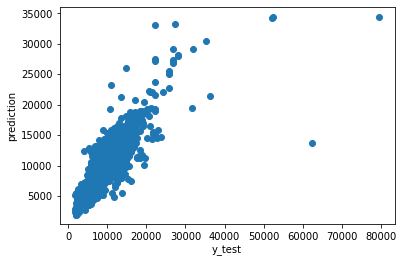

In [116]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('prediction')

<font size=4>**Prediction of the price of ticket**

In [117]:
pred

array([ 8212.52,  7615.74,  3882.01, ...,  8542.35, 11003.48, 10271.45])

# Saving the model

In [118]:
import joblib
joblib.dump(rf,'ticket_price.pkl')

['ticket_price.pkl']